In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split, ConcatDataset
import matplotlib.pyplot as plt
import time


if torch.cuda.is_available():
    device = torch.device('cuda')
    print(" Success: GPU Found! Training will be fast.")
else:
    device = torch.device('cpu')
    print(" Warning: Using CPU. Training might be slow.")


stats = ((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
my_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(*stats)
])

print("\n Downloading the Flowers-102 Dataset...")


try:
    set1 = torchvision.datasets.Flowers102(root='./data', split='train', download=True, transform=my_transform)
    set2 = torchvision.datasets.Flowers102(root='./data', split='val', download=True, transform=my_transform)
    set3 = torchvision.datasets.Flowers102(root='./data', split='test', download=True, transform=my_transform)


    full_dataset = ConcatDataset([set1, set2, set3])
    total_images = len(full_dataset)
    print(f" Download Complete. Total images: {total_images}")


    train_count = int(0.8 * total_images)
    val_count = int(0.1 * total_images)
    test_count = total_images - train_count - val_count


    train_data, val_data, test_data = random_split(full_dataset, [train_count, val_count, test_count])

    print("\n My Custom Data Split:")
    print(f"   Training Images:   {len(train_data)} (80%)")
    print(f"   Validation Images: {len(val_data)} (10%)")
    print(f"   Test Images:       {len(test_data)} (10%)")


    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=64, shuffle=False)
    print(" DataLoaders are ready.")

except Exception as e:
    print(f" Something went wrong: {e}")

 Success: GPU Found! Training will be fast.

 Download Complete. Total images: 8189

 My Custom Data Split:
   Training Images:   6551 (80%)
   Validation Images: 818 (10%)
   Test Images:       820 (10%)
 DataLoaders are ready.


In [ ]:
def train_my_model(model, name, epochs=5, lr=0.0001, weight_decay=0):
    print(f"\nStarting training for: {name}")

    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        start_time = time.time()

        model.train()
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc = 100 * correct / total

        model.eval()
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_acc = 100 * val_correct / val_total
        time_taken = time.time() - start_time

        print(f"Epoch {epoch+1}/{epochs} | Train Acc: {train_acc:.1f}% | Val Acc: {val_acc:.1f}% | Time: {time_taken:.0f}s")

        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

    torch.save(model.state_dict(), f"{name}.pth")
    print(f"Saved model to {name}.pth")

    plt.figure(figsize=(8, 4))
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title(f"Accuracy Curve: {name}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return model

Using: cuda
Loading ResNet18...

Epoch 1/5
  Training Loss: 2.4332
  Validation Accuracy: 86.19%

Epoch 2/5
  Training Loss: 0.5935
  Validation Accuracy: 95.60%

Epoch 3/5
  Training Loss: 0.1769
  Validation Accuracy: 96.58%

Epoch 4/5
  Training Loss: 0.0673
  Validation Accuracy: 97.07%

Epoch 5/5
  Training Loss: 0.0346
  Validation Accuracy: 97.19%

Training Completed.
Saved: level1_beginner_model.pth


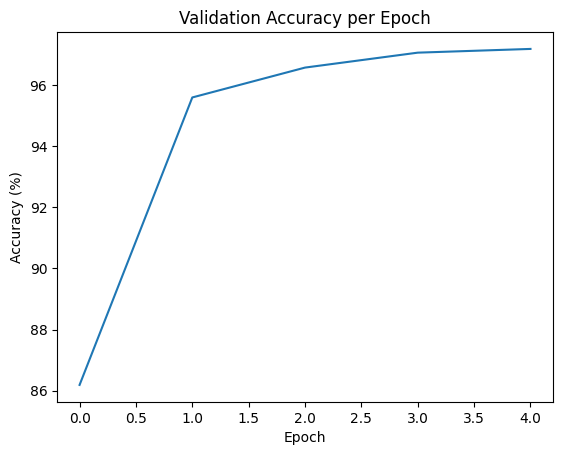

In [ ]:
# LEVEL 1

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split, ConcatDataset
import matplotlib.pyplot as plt

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using: {device}")

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Dataset
print("Downloading dataset...")
train_set = torchvision.datasets.Flowers102(root='./data', split='train', download=True, transform=transform)
val_set = torchvision.datasets.Flowers102(root='./data', split='val', download=True, transform=transform)
test_set = torchvision.datasets.Flowers102(root='./data', split='test', download=True, transform=transform)

full_dataset = ConcatDataset([train_set, val_set, test_set])
total = len(full_dataset)

train_count = int(0.8 * total)
val_count = int(0.1 * total)
test_count = total - train_count - val_count

train_data, val_data, test_data = random_split(full_dataset, [train_count, val_count, test_count])

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Model
print("Loading ResNet18...")
model = torchvision.models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 102)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

train_losses = []
val_accuracies = []

epochs = 5

# Training
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    model.train()
    running_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"  Training Loss: {avg_loss:.4f}")

    model.eval()
    correct = 0
    total_samples = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total_samples += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = 100 * correct / total_samples
    val_accuracies.append(acc)
    print(f"  Validation Accuracy: {acc:.2f}%")

# Save
print("\nTraining Completed.")
torch.save(model.state_dict(), "level1_beginner_model.pth")
print("Saved: level1_beginner_model.pth")

plt.plot(val_accuracies)
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.show()

In [ ]:
# LEVEL 2

print("\n--- STARTING LEVEL 2 ---")

aug_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print("Setting up ResNet18...")
model_2 = torchvision.models.resnet18(pretrained=True)
model_2.fc = nn.Linear(model_2.fc.in_features, 102)
model_2 = model_2.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.0001, weight_decay=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

epochs = 8
train_accuracies = []

for epoch in range(epochs):
    print(f"Epoch {epoch+1}...")
    model_2.train()
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    scheduler.step()
    acc = 100 * correct / total
    train_accuracies.append(acc)
    print(f"  > Training Accuracy: {acc:.2f}%")

torch.save(model_2.state_dict(), "level2_model.pth")
print("Level 2 Model Saved.")



--- STARTING LEVEL 2 ---
Setting up ResNet18...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1...
  > Training Accuracy: 55.12%
Epoch 2...
  > Training Accuracy: 94.98%
Epoch 3...
  > Training Accuracy: 99.25%
Epoch 4...
  > Training Accuracy: 99.88%
Epoch 5...
  > Training Accuracy: 99.91%
Epoch 6...
  > Training Accuracy: 99.94%
Epoch 7...
  > Training Accuracy: 99.94%
Epoch 8...
  > Training Accuracy: 99.94%
Level 2 Model Saved.


In [ ]:
# LEVEL 3

print("\n--- STARTING LEVEL 3 ---")

class MyCustomModel(nn.Module):
    def __init__(self):
        super(MyCustomModel, self).__init__()
        self.body = torchvision.models.resnet34(pretrained=True)
        in_features = self.body.fc.in_features
        self.body.fc = nn.Identity()

        self.my_head = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 102)
        )

    def forward(self, x):
        x = self.body(x)
        x = self.my_head(x)
        return x

print("Building Custom ResNet34...")
model_3 = MyCustomModel().to(device)

optimizer = optim.Adam(model_3.parameters(), lr=0.0001)

epochs = 10
print(f"Training Custom Model for {epochs} epochs...")

for epoch in range(epochs):
    model_3.train()
    running_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_3(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

torch.save(model_3.state_dict(), "level3_custom_model.pth")
print("Level 3 Custom Model Saved.")


--- STARTING LEVEL 3 ---
Building Custom ResNet34...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 172MB/s]


Training Custom Model for 10 epochs...
Epoch 1/10 - Loss: 3.0858
Epoch 2/10 - Loss: 1.2218
Epoch 3/10 - Loss: 0.4746
Epoch 4/10 - Loss: 0.2040
Epoch 5/10 - Loss: 0.1051
Epoch 6/10 - Loss: 0.0689
Epoch 7/10 - Loss: 0.0481
Epoch 8/10 - Loss: 0.0379
Epoch 9/10 - Loss: 0.0304
Epoch 10/10 - Loss: 0.0261
Level 3 Custom Model Saved.


In [ ]:
# LEVEL 4 – ENSEMBLE

print("\n--- STARTING LEVEL 4: ENSEMBLE ---")

print("Loading Level 2 Model...")
model_A = torchvision.models.resnet18(pretrained=False)
model_A.fc = nn.Linear(512, 102)
model_A.load_state_dict(torch.load("level2_model.pth"))
model_A = model_A.to(device)
model_A.eval()

print("Loading Level 3 Model...")
model_B = MyCustomModel()
model_B.load_state_dict(torch.load("level3_custom_model.pth"))
model_B = model_B.to(device)
model_B.eval()

print("Running prediction on Test Set...")
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        out_A = model_A(images)
        out_B = model_B(images)

        final_out = (out_A + out_B) / 2
        _, predicted = torch.max(final_out, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

final_acc = 100 * correct / total

print("\n*********************************************")
print(f"FINAL ENSEMBLE ACCURACY: {final_acc:.2f}%")
print("*********************************************")

if final_acc > 90:
    print("Great result! This should pass the shortlist criteria.")
else:
    print("Good result, but consider training longer.")



--- STARTING LEVEL 4: ENSEMBLE ---
Loading Level 2 Model...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loading Level 3 Model...
Running prediction on Test Set...

*********************************************
FINAL ENSEMBLE ACCURACY: 98.29%
*********************************************
Great result! This should pass the shortlist criteria.


--- MODEL PREDICTIONS ---
Top: True Label | Bottom: Model Prediction



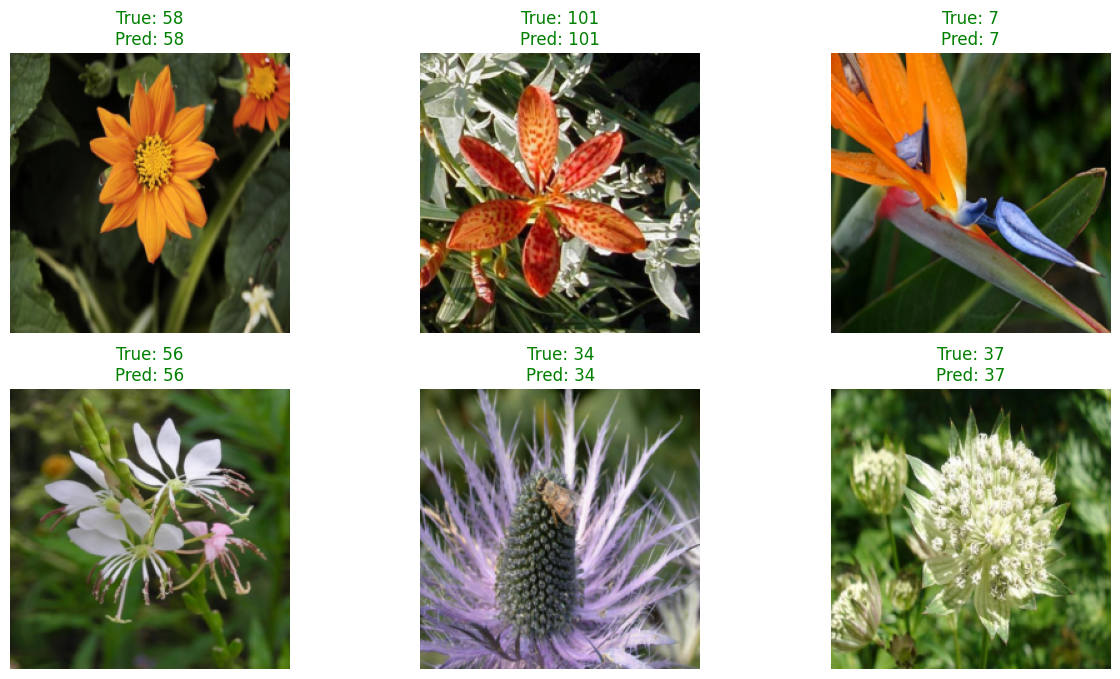

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# VISUAL TEST

dataiter = iter(test_loader)
images, labels = next(dataiter)

images = images[:6]
labels = labels[:6]

images_gpu = images.to(device)

out_A = model_A(images_gpu)
out_B = model_B(images_gpu)

avg_out = (out_A + out_B) / 2
_, predicted = torch.max(avg_out, 1)

def imshow(img):
    img = img.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = np.clip(std * img + mean, 0, 1)
    plt.imshow(img)
    plt.axis('off')

print("--- MODEL PREDICTIONS ---")
print("Top: True Label | Bottom: Model Prediction\n")

plt.figure(figsize=(15, 8))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    imshow(images[i])

    t = f"True: {labels[i].item()}"
    p = f"Pred: {predicted[i].item()}"
    color = "green" if labels[i] == predicted[i] else "red"

    ax.set_title(f"{t}\n{p}", color=color, fontsize=12)

plt.show()